# Supervised Modeling
Courtesy of Intel Advanced Analytics

Some comments for the exercise:
- Throughout this exercise we will use the 'iris' dataset of flowers to practice several classification methods. To that end, we will consider two species of flowers, Virginica and Versicolor, and compare various ways to classify whether a flower is Virginica or not (i.e. we will consider Virginica to be 'positive' and Versicolor to be 'negative')
- We provide you with a couple of helper functions to use throughout the exercise. Read their documentation to understand how to use them.

# Question 1

a) Download the iris database (you can read about it here: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/iris.html), and read it into a dataframe.
First, filter out every instance of the 'setosa' species.
Next, use the pandas function scatter_matrix to visualize the data, and print the correlation between the numeric values.

In [38]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

iris_df = pd.read_csv('iris.csv')
filtered_df = iris_df[iris_df.Species != "setosa"]

scatter_matrix(filtered_df, diagonal='kde')
plt.savefig(r"scatter_matrix_setosa.png")

filtered_df.head(5)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,51,7.0,3.2,4.7,1.4,versicolor
51,52,6.4,3.2,4.5,1.5,versicolor
52,53,6.9,3.1,4.9,1.5,versicolor
53,54,5.5,2.3,4.0,1.3,versicolor
54,55,6.5,2.8,4.6,1.5,versicolor


b) Describe the output of the scatter_matrix function. What does it tell us?
Based on that, which two features would you choose to work with, if you had only two?

The scatter matrix plots a scatter distribution comparing each pairs of features present in the dataframe. We can see in these figure how the features realates to each other. If I have to choose discard two features of the dataset, I would discard the Petal.Width because it has a low variance and the Sepal.Width beacause it is already highly correlated with the Sepal.Length and Sepal.Length reminds me more of a normal distribution. Therefore I would choose Sepal.Length and Petal.Length.

# Question 2

a) Randomly divide the iris dataset into a training set and a test set (Use your previous knowledge to come up with reasonable prportions of data for each set). Train a K-NN based classifier on the train set as following:
- Use K=5 as number of neighbors.
- Use the two features that you chose on question 1 as training data, and the 'Species' attribute as the target value.

Use the model to make a prediction on the test set, and generate the confusion matrix. Use our helper function given to you in helper_functions.py to plot the confusion matrix and draw the decision boundary.

Confusion matrix, without normalization
[[14  1]
 [ 1 14]]


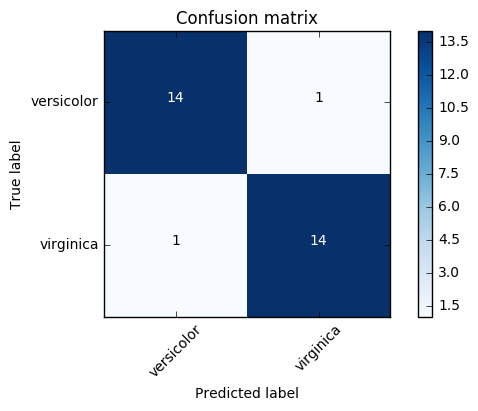

Accuracy: 0.933333333333
Precision: 0.933333333333
Recall: 0.933333333333


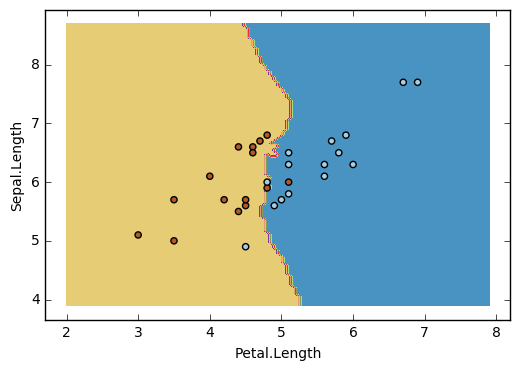

In [42]:
from sklearn.cross_validation import train_test_split
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix
from helper_functions import plot_confusion_matrix, decision_boundary  #Provided by the exercise

# Split train and test dataset
train, test = train_test_split(filtered_df, test_size = 0.3)

# Train K-NN based classifier 
train_X = train[["Petal.Length", "Sepal.Length"]]
train_Y = train["Species"]

test_X = test[["Petal.Length", "Sepal.Length"]]
test_Y = test["Species"]

def predict_and_plot_knn(train_X, train_Y, test_X, test_Y, k):
    knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(train_X, train_Y)

    # Make predictions
    prediction_Y = knn_classifier.predict(test_X)
    cm = confusion_matrix(test_Y, prediction_Y)
    classes = filtered_df.Species.unique()

    # Plot the confusion matrix
    plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues)

    # Note that this is the prediction boundary just between non-virginica and virginica
    decision_boundary(test_X, test_Y, knn_classifier)
    
predict_and_plot_knn(train_X, train_Y, test_X, test_Y, 5)


b) Try changing the K parameter from 1 to 10, and print the results. How does it affect the confusion matrix and draw boundary? 

Results for k = 1
Confusion matrix, without normalization
[[14  1]
 [ 2 13]]


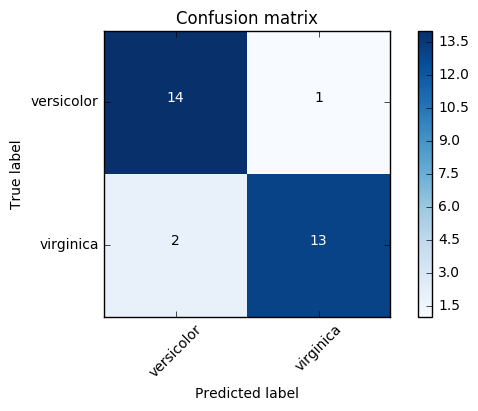

Accuracy: 0.9
Precision: 0.866666666667
Recall: 0.928571428571


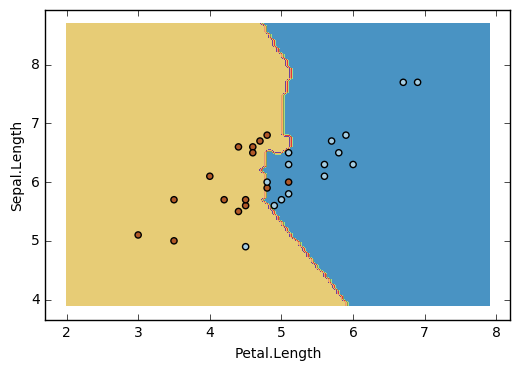

Results for k = 2
Confusion matrix, without normalization
[[14  1]
 [ 2 13]]


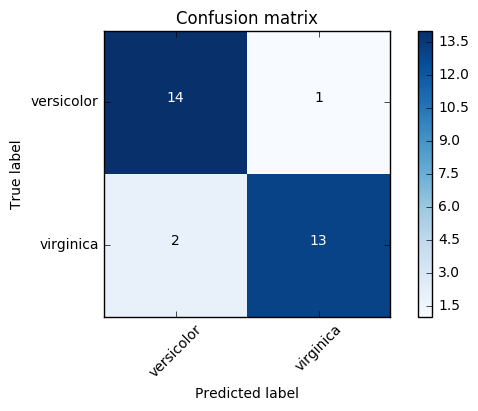

Accuracy: 0.9
Precision: 0.866666666667
Recall: 0.928571428571


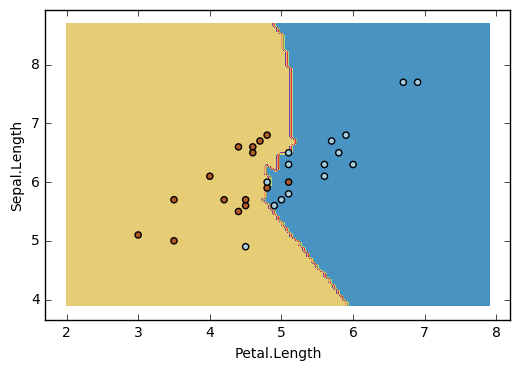

Results for k = 3
Confusion matrix, without normalization
[[14  1]
 [ 2 13]]


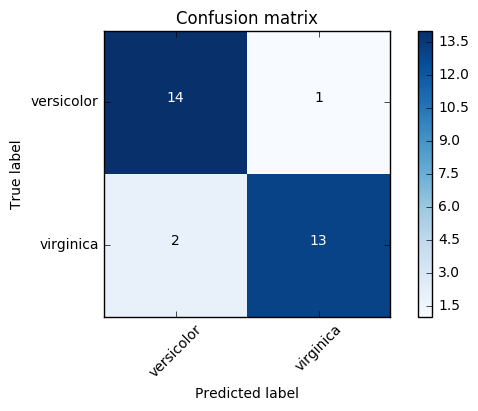

Accuracy: 0.9
Precision: 0.866666666667
Recall: 0.928571428571


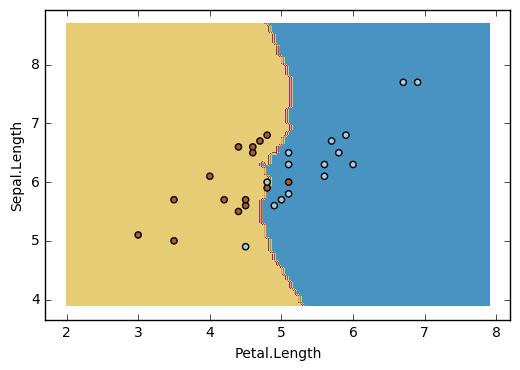

Results for k = 4
Confusion matrix, without normalization
[[14  1]
 [ 2 13]]


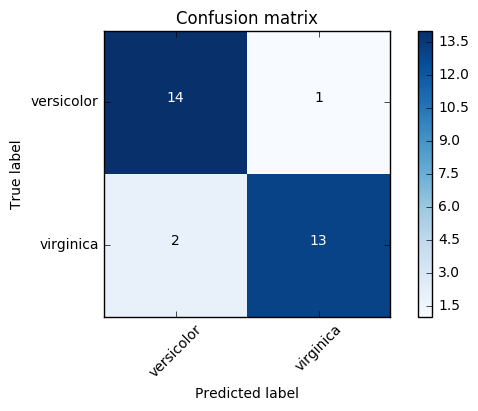

Accuracy: 0.9
Precision: 0.866666666667
Recall: 0.928571428571


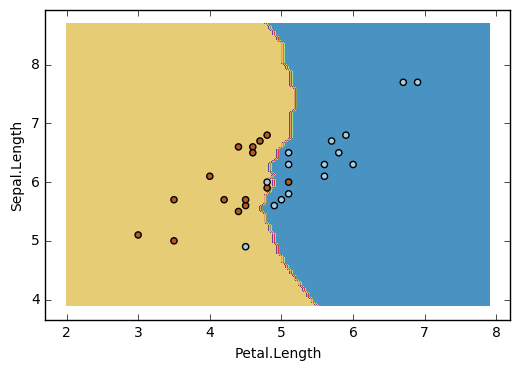

Results for k = 5
Confusion matrix, without normalization
[[14  1]
 [ 1 14]]


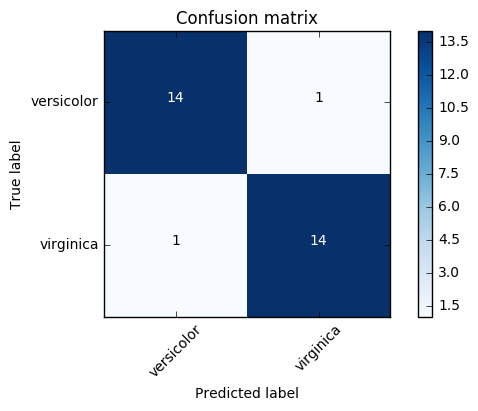

Accuracy: 0.933333333333
Precision: 0.933333333333
Recall: 0.933333333333


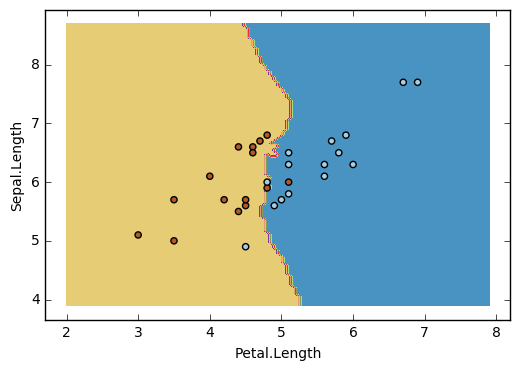

Results for k = 6
Confusion matrix, without normalization
[[14  1]
 [ 2 13]]


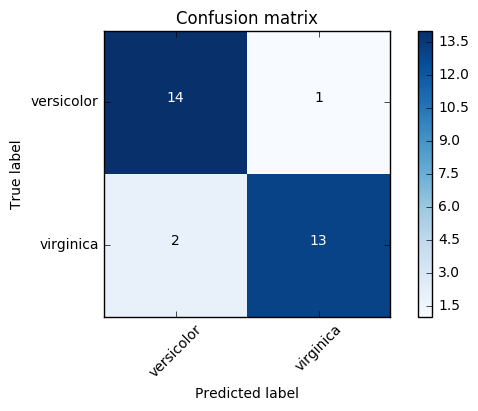

Accuracy: 0.9
Precision: 0.866666666667
Recall: 0.928571428571


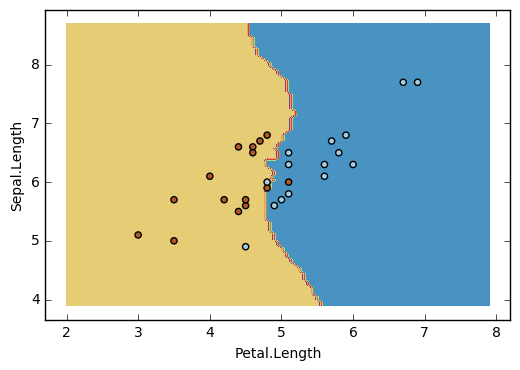

Results for k = 7
Confusion matrix, without normalization
[[13  2]
 [ 2 13]]


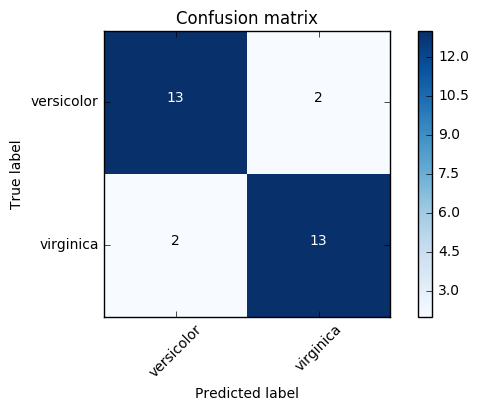

Accuracy: 0.866666666667
Precision: 0.866666666667
Recall: 0.866666666667


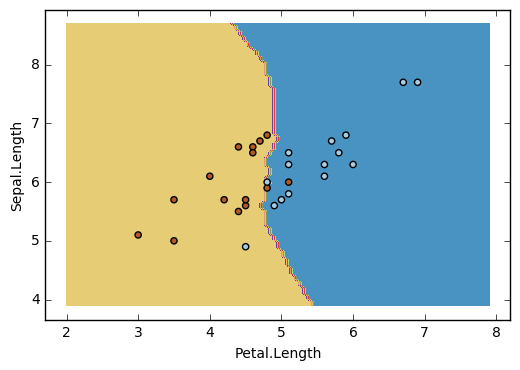

Results for k = 8
Confusion matrix, without normalization
[[14  1]
 [ 2 13]]


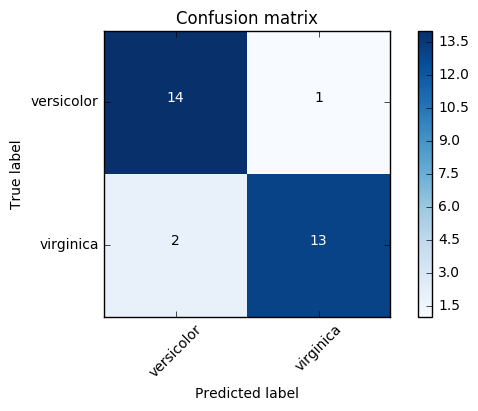

Accuracy: 0.9
Precision: 0.866666666667
Recall: 0.928571428571


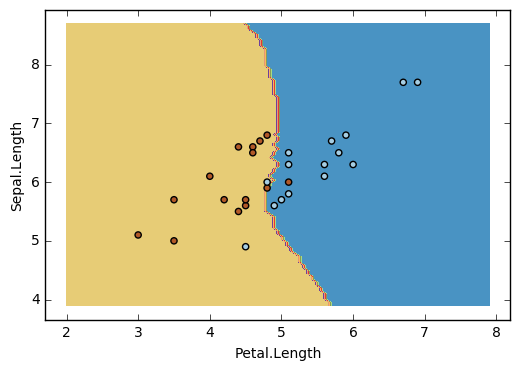

Results for k = 9
Confusion matrix, without normalization
[[14  1]
 [ 2 13]]


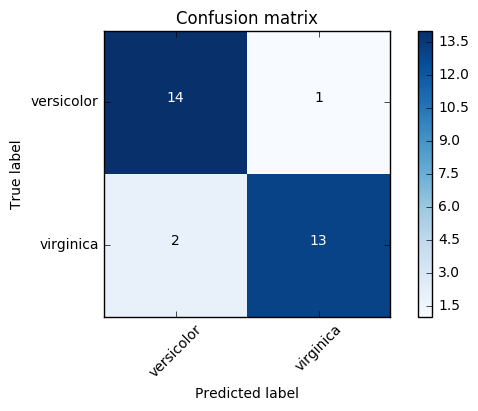

Accuracy: 0.9
Precision: 0.866666666667
Recall: 0.928571428571


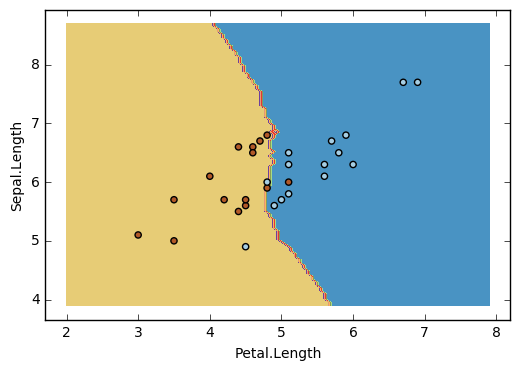

Results for k = 10
Confusion matrix, without normalization
[[14  1]
 [ 3 12]]


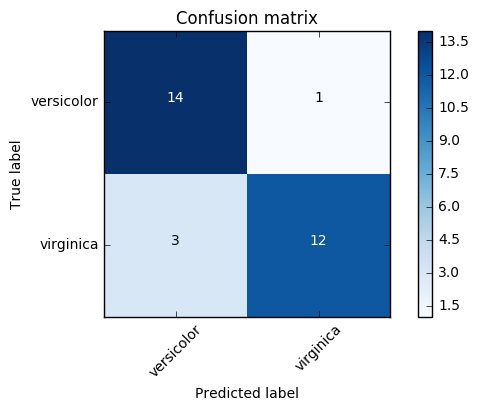

Accuracy: 0.866666666667
Precision: 0.8
Recall: 0.923076923077


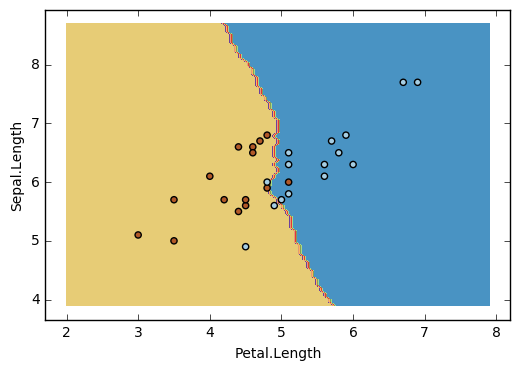

In [43]:
for k in xrange(1,11):
    print "Results for k =",k
    predict_and_plot_knn(train_X, train_Y, test_X, test_Y, k)


The result is the same for k =3,4,5 but it get worst both for more than k > 5 (probably because of overfitting) and k < 3 (probably because of underfitting). The precision, the accuracy and the precision are being reduced both in the overfitting and in the underfitting scenarios.

d) Now try it with K=5 and all the original features. Plot the confusion matrix. Do the results improve? Can we conclude something from it?

Confusion matrix, without normalization
[[33  2]
 [ 1 34]]


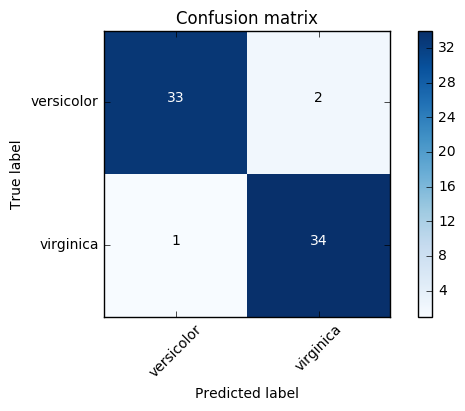

Accuracy: 0.957142857143
Precision: 0.971428571429
Recall: 0.944444444444


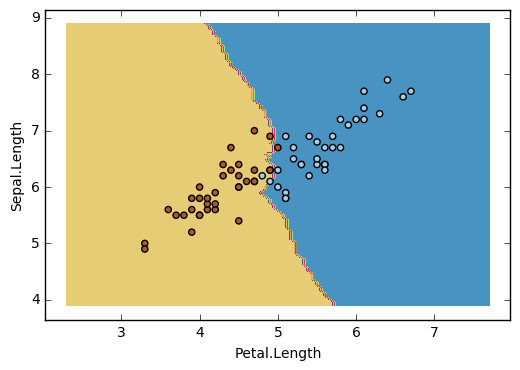

In [44]:
predict_and_plot_knn(train_X, train_Y, train_X, train_Y, k)

The precision and accuracy decreased in the confusion matrix. This coulb be seen as a positive indication that no overfitting driver was injected into our estimator. Since the results with the train set were better, we cannot say that our estimator are underfitting the prediction.

# Question 3

a) Train a Guassian Naive Bayes Classifier on the training set in a similar fashion to question 2a - The two selected featues from Q1 as data, and the 'Species' column as target variable. Use it to predict on the test set, and plot the confusion matrix.

Confusion matrix, without normalization
[[13  2]
 [ 4 11]]


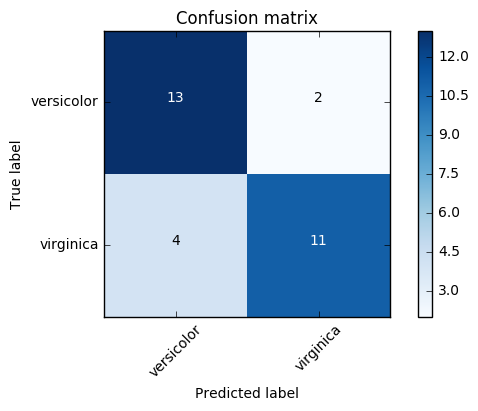

Accuracy: 0.8
Precision: 0.733333333333
Recall: 0.846153846154


In [45]:
from sklearn.naive_bayes import GaussianNB

# Train K-NN based classifier 
train_X = train[["Petal.Length", "Sepal.Length"]]
train_Y = train["Species"]

test_X = test[["Petal.Length", "Sepal.Length"]]
test_Y = test["Species"]

gaussian_classifier = GaussianNB()
gaussian_classifier.fit(train_X, train_Y)

# Make predictions
prediction_Y = gaussian_classifier.predict(test_X)
cm = confusion_matrix(test_Y, prediction_Y)
classes = filtered_df.Species.unique()

# Plot the confusion matrix
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues)

b) Before looking at the decision boundary, how would you expect it to look? Would it be different from the decision boundry of KNN? How?

Since the Guassian Naive Bayes Classifier boudary is generated from a Gaussian distribution, I could expect the boundary to remind of 2 dimensional normal distribution.

c) Plot the decision boundary, why do you think it looks different than the KNNs?

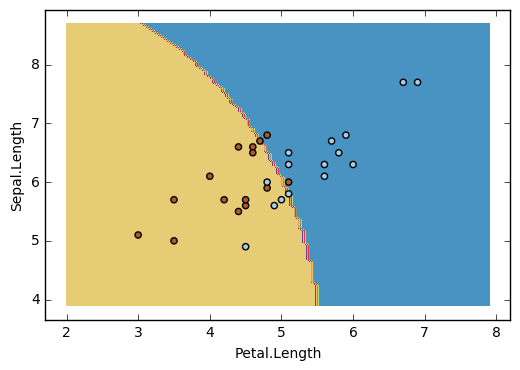

In [46]:
decision_boundary(test_X, test_Y, gaussian_classifier)

It looks different because the KNN´s boudary is generated from a surface with no shape restriction and the Guassian Naive Bayes Classifier´s boudary is generated from a Gaussian distribution.

d) Now use all features. How does this affect the confusion matrix? Draw the decision boundary (Since we cannot really visualize a 4-dimensional plot, use only 'Sepal.Length' and 'Sepal.Width' as X for the boundary function but use the predictor trained on all features)

Confusion matrix, without normalization
[[14  1]
 [ 2 13]]


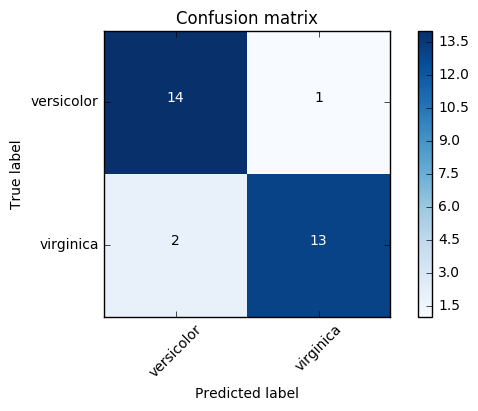

Accuracy: 0.9
Precision: 0.866666666667
Recall: 0.928571428571


In [47]:
# Guassian Naive Bayes Classifier
train_X = train[["Sepal.Width","Sepal.Length", "Petal.Length", "Petal.Width"]]
train_Y = train["Species"]

test_X = test[["Sepal.Width","Sepal.Length", "Petal.Length", "Petal.Width"]]
test_Y = test["Species"]

gaussian_classifier = GaussianNB()
gaussian_classifier.fit(train_X, train_Y)

# Make predictions
prediction_Y = gaussian_classifier.predict(test_X)
cm = confusion_matrix(test_Y, prediction_Y)
classes = filtered_df.Species.unique()

# Plot the confusion matrix
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues)

# I think it is not possible to plot this boundary since the classifier was setup with 4 parameter and not two. Does not make sense for me.
# test_X = test[["Sepal.Width","Sepal.Length"]]
# decision_boundary(test_X, test_Y, gaussian_classifier) 

e) Print the normal distribution attributes that were used to fit the data. How does the classifier work? Explain in your own words.

You can use the documentation of the GNB here: http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [48]:
print "probability of each target class:",gaussian_classifier.class_prior_ 
print "\nnumber of training samples observed in each class:",gaussian_classifier.class_count_
print "\nmean of each feature per class:",gaussian_classifier.theta_ 
print "\nvariance of each feature per class:",gaussian_classifier.sigma_  

probability of each target class: [ 0.5  0.5]

number of training samples observed in each class: [ 35.  35.]

mean of each feature per class: [[ 2.76571429  5.92285714  4.24        1.31714286]
 [ 2.97142857  6.7         5.56857143  2.01714286]]

variance of each feature per class: [[ 0.10453878  0.24119184  0.17497143  0.03513469]
 [ 0.08718367  0.30742857  0.23872653  0.05856327]]


A typical assumption is that the continuous values associated with each class are distributed according to a Gaussian distribution. Suppose the training data contains a continuous attribute x. We first segment the data by the target class, and then compute the mean and variance of x in each class. Let muc be the mean of the values in x associated with class c, and let s2c be the variance of the values in x associated with class c. Suppose we have collected some observation value v. Then, the probability distribution of v given a class c, p(x=v|c), can be computed by plugging v into the equation for a Normal distribution parameterized by muc and s2c. = With the conditional probabilities calculated, we can follow the classification problem assuming the independence assumption and observing what is the biggest probablity for the target class.

# Question 4

1) Fit a decision tree using all the features.

In [49]:
from sklearn import tree

# Train Decision Tree based classifier 
train_X = train[["Sepal.Width","Sepal.Length", "Petal.Length", "Petal.Width"]]
train_Y = train["Species"]

test_X = test[["Sepal.Width","Sepal.Length", "Petal.Length", "Petal.Width"]]
test_Y = test["Species"]

tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(train_X, train_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

2) How does it perform on the test set?

Confusion matrix, without normalization
[[13  2]
 [ 1 14]]


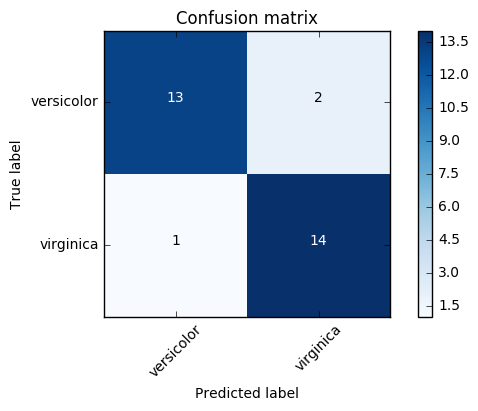

Accuracy: 0.9
Precision: 0.933333333333
Recall: 0.875


In [51]:
# Make predictions
prediction_Y = tree_classifier.predict(test_X)
cm = confusion_matrix(test_Y, prediction_Y)
classes = filtered_df.Species.unique()

# Plot the confusion matrix
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues)

3) Fit a decision tree only using 'Sepal Length' and 'Sepal Width'. What does the classification boundary look like now?

Confusion matrix, without normalization
[[12  3]
 [ 9  6]]


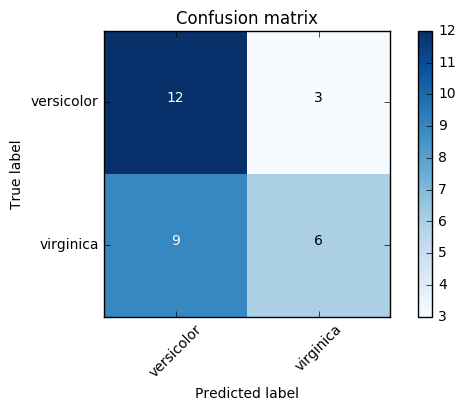

Accuracy: 0.6
Precision: 0.4
Recall: 0.666666666667


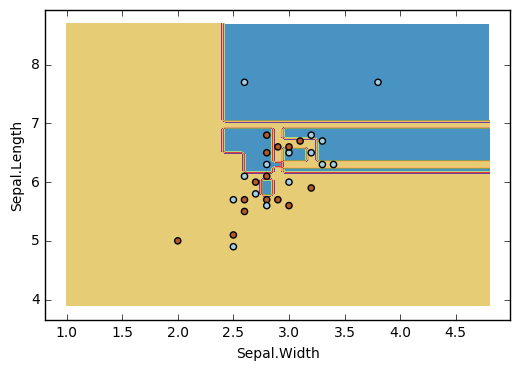

In [54]:
from helper_functions import plot_confusion_matrix, decision_boundary  #Provided by the exercise

# Train Decision Tree based classifier 
train_X = train[["Sepal.Width","Sepal.Length"]]
train_Y = train["Species"]

test_X = test[["Sepal.Width","Sepal.Length"]]
test_Y = test["Species"]

tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(train_X, train_Y)

# Make predictions
prediction_Y = tree_classifier.predict(test_X)
cm = confusion_matrix(test_Y, prediction_Y)
classes = filtered_df.Species.unique()

# Plot the confusion matrix
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues)
decision_boundary(test_X, test_Y, tree_classifier) 

4) Can you explain why the decision boundary now looks like this?

The decision tree algorithm tries to partition the predictor space in a way that minimize the loss function. This is way the decision boundary seems so discontinuous and non-linear.

5) When calculating the accuracy, precision and recall, we consider one of the species to be a positive classification and the other to be positive. Would anything change if we changed who we considered positive and who we considered negative? If so - what? Why?

Yes, in the function of plot_confusion_matrix() of the helper .py file we would need to do a change. The calculations of Precision and Recall would need to reflect the new class that would be treated as the positive (currently the implementation is treating 'versicolor' as positive). The calculation of Accuracy would not change since it consider the global true prediction by summing the diagonal of the confusion matrix.

# Question 5

1) Try using linear SVM with all the features - how did it do? How many support vectors were neaded?

Confusion matrix, without normalization
[[14  1]
 [ 0 15]]


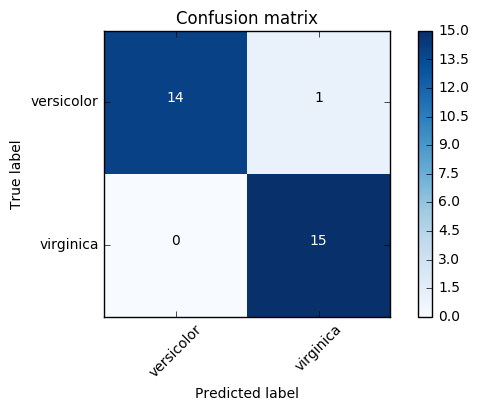

Accuracy: 0.966666666667
Precision: 1.0
Recall: 0.9375
Number of vectors needed: 16


In [56]:
from sklearn import svm

# Train SVN based classifier 
train_X = train[["Sepal.Width","Sepal.Length", "Petal.Length", "Petal.Width"]]
train_Y = train["Species"]

test_X = test[["Sepal.Width","Sepal.Length", "Petal.Length", "Petal.Width"]]
test_Y = test["Species"]

svn_classifier = svm.SVC(kernel='linear')
svn_classifier.fit(train_X, train_Y)

# Make predictions
prediction_Y = svn_classifier.predict(test_X)
cm = confusion_matrix(test_Y, prediction_Y)
classes = filtered_df.Species.unique()

# Plot the confusion matrix
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues)
# decision_boundary(test_X, test_Y, svn_classifier) 

# Print SVN Informations
print "Number of vectors needed:",len(svn_classifier.support_vectors_)

2) Repeat only with 'Sepal.Length' and 'Sepal.Width'.

Confusion matrix, without normalization
[[10  5]
 [ 6  9]]


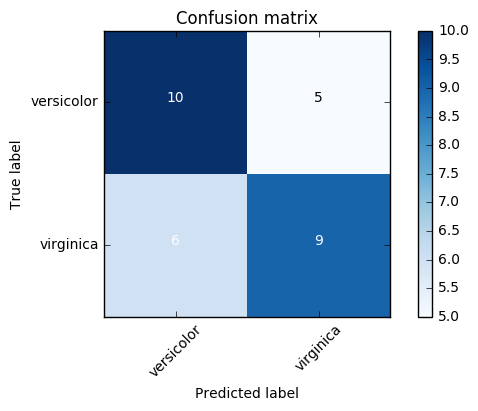

Accuracy: 0.633333333333
Precision: 0.6
Recall: 0.642857142857


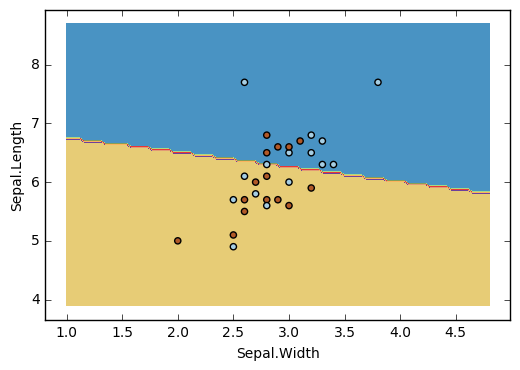

Number of vectors needed: 44


In [59]:
# Train SVN based classifier 
train_X = train[["Sepal.Width","Sepal.Length"]]
train_Y = train["Species"]

test_X = test[["Sepal.Width","Sepal.Length"]]
test_Y = test["Species"]

svn_classifier = svm.SVC(kernel='linear')
svn_classifier.fit(train_X, train_Y)

# Make predictions
prediction_Y = svn_classifier.predict(test_X)
cm = confusion_matrix(test_Y, prediction_Y)
classes = filtered_df.Species.unique()

# Plot the confusion matrix
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues)
decision_boundary(test_X, test_Y, svn_classifier) 

# Print SVN Informations
print "Number of vectors needed:",len(svn_classifier.support_vectors_)

3) Repeat only with 'Sepal.Length' and 'Sepal.Width' but using a radial kernel (rbf).

Confusion matrix, without normalization
[[10  5]
 [ 6  9]]


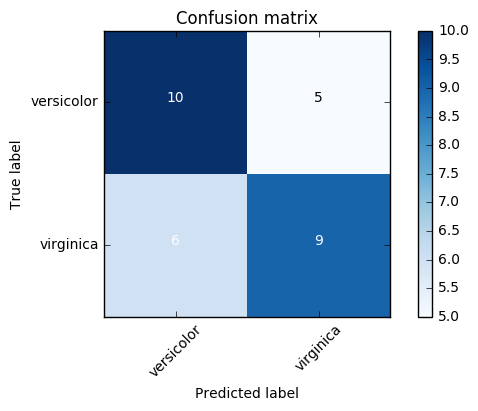

Accuracy: 0.633333333333
Precision: 0.6
Recall: 0.642857142857


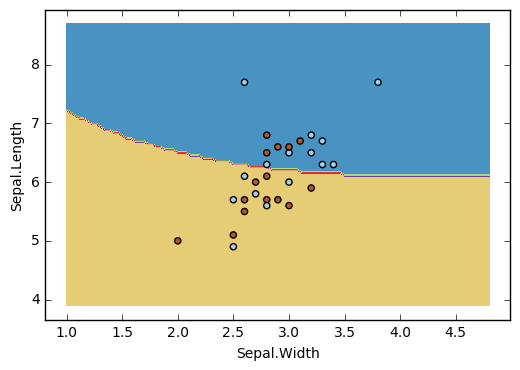

Number of vectors needed: 44


In [61]:
# Train SVN based classifier 
train_X = train[["Sepal.Width","Sepal.Length"]]
train_Y = train["Species"]

test_X = test[["Sepal.Width","Sepal.Length"]]
test_Y = test["Species"]

svn_classifier = svm.SVC(kernel='rbf')
svn_classifier.fit(train_X, train_Y)

# Make predictions
prediction_Y = svn_classifier.predict(test_X)
cm = confusion_matrix(test_Y, prediction_Y)
classes = filtered_df.Species.unique()

# Plot the confusion matrix
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues)
decision_boundary(test_X, test_Y, svn_classifier) 

# Print SVN Informations
print "Number of vectors needed:",len(svn_classifier.support_vectors_)

4) Using only the features 'Sepal Length' and 'Petal Length' (the 1'st and the 3'rd), try a wide range of cost parameters (sqy, between 0.01 and 100). How does it affect the shape of the boundary? The performance?

Confusion matrix, without normalization
[[14  1]
 [ 5 10]]


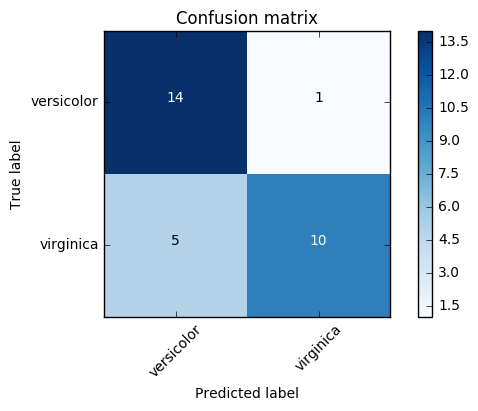

Accuracy: 0.8
Precision: 0.666666666667
Recall: 0.909090909091
Number of vectors needed: 70


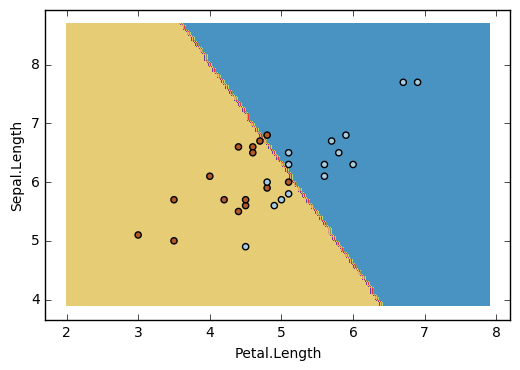

Confusion matrix, without normalization
[[14  1]
 [ 5 10]]


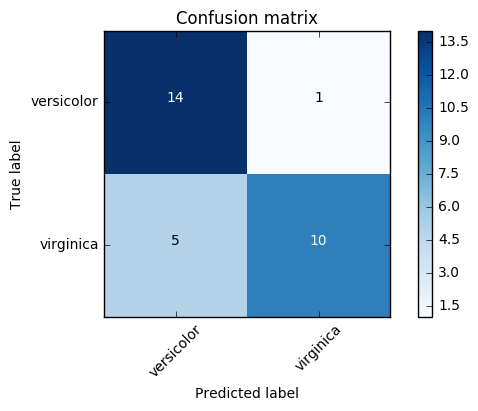

Accuracy: 0.8
Precision: 0.666666666667
Recall: 0.909090909091
Number of vectors needed: 68


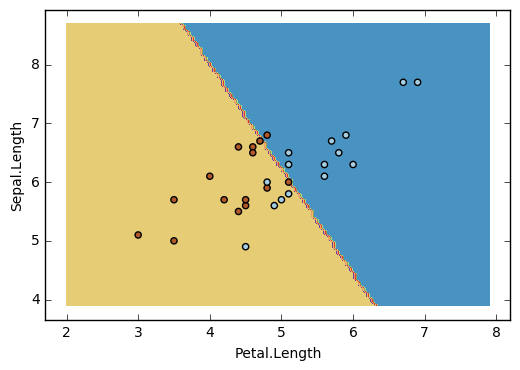

Confusion matrix, without normalization
[[13  2]
 [ 3 12]]


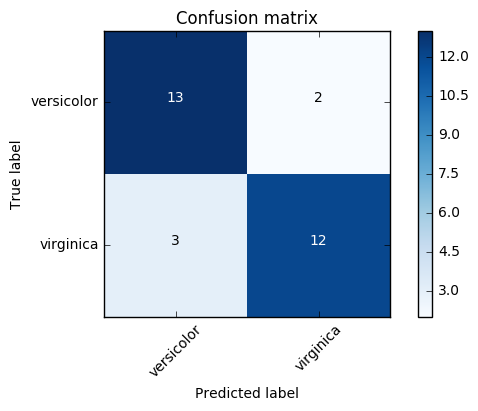

Accuracy: 0.833333333333
Precision: 0.8
Recall: 0.857142857143
Number of vectors needed: 40


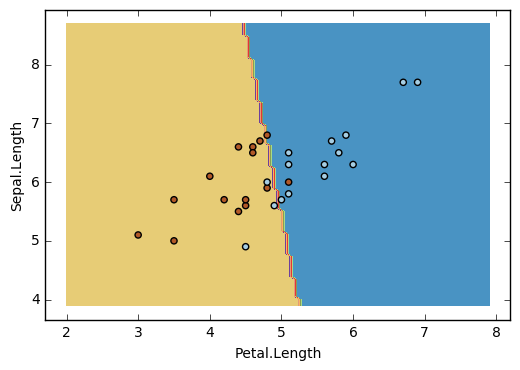

Confusion matrix, without normalization
[[13  2]
 [ 2 13]]


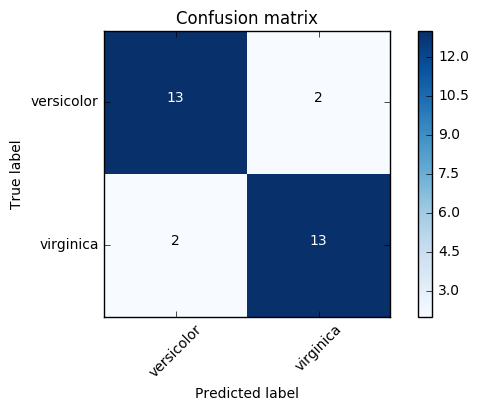

Accuracy: 0.866666666667
Precision: 0.866666666667
Recall: 0.866666666667
Number of vectors needed: 22


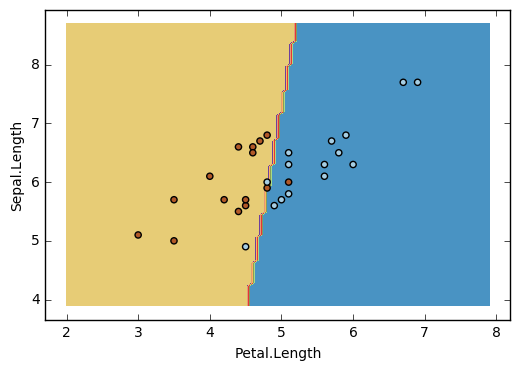

Confusion matrix, without normalization
[[14  1]
 [ 2 13]]


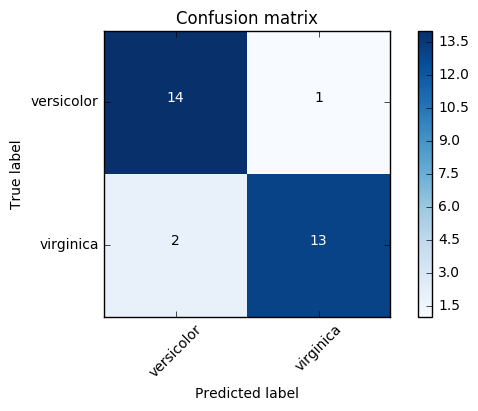

Accuracy: 0.9
Precision: 0.866666666667
Recall: 0.928571428571
Number of vectors needed: 12


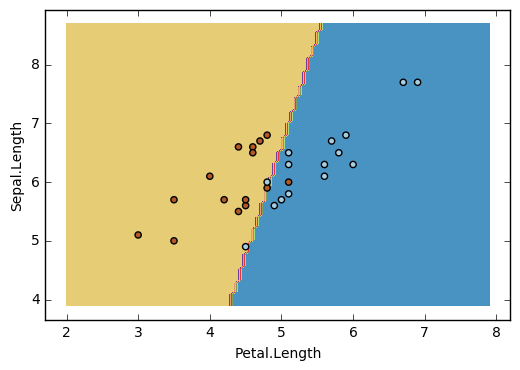

Confusion matrix, without normalization
[[13  2]
 [ 0 15]]


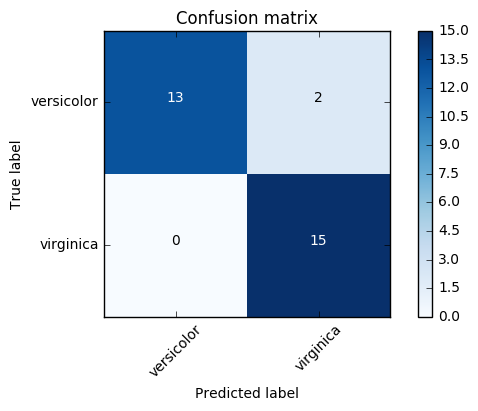

Accuracy: 0.933333333333
Precision: 1.0
Recall: 0.882352941176
Number of vectors needed: 9


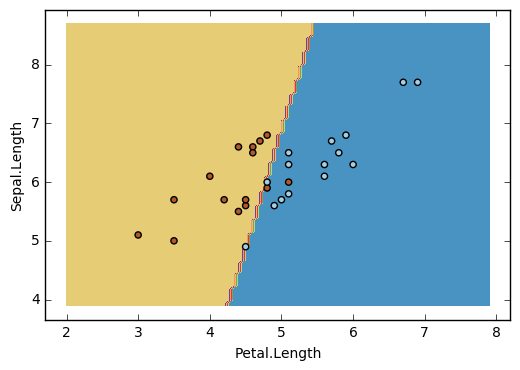

In [63]:
# Train SVN based classifier 
train_X = train[["Petal.Length","Sepal.Length"]]
train_Y = train["Species"]

test_X = test[["Petal.Length","Sepal.Length"]]
test_Y = test["Species"]

# define tolerance range
cost_array = [0.01, 0.1, 1, 10, 100]
for cost in tol_array:
    svn_classifier = svm.SVC(kernel='linear', C = cost)
    svn_classifier.fit(train_X, train_Y)

    # Make predictions
    prediction_Y = svn_classifier.predict(test_X)
    cm = confusion_matrix(test_Y, prediction_Y)
    classes = filtered_df.Species.unique()

    # Plot the confusion matrix
    plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues)
    # Print SVN Informations
    print "Number of vectors needed:",len(svn_classifier.support_vectors_)
    
    decision_boundary(test_X, test_Y, svn_classifier) 

    

As the cost parameter increases the required number of vectors needed decreases, the boundary stability is more sensitive to prediction errors and the performance increases.